In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [2]:
df = pd.read_csv("C:\\Users\\rafal\\OneDrive\\Pulpit\\PSI\\TheStrokes.csv")
df.describe()
df = df.fillna(df.mean())
df=df.rename(columns={"stroke":"target"})

In [3]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,target
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>],
       [<AxesSubplot:title={'center':'work_type'}>,
        <AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

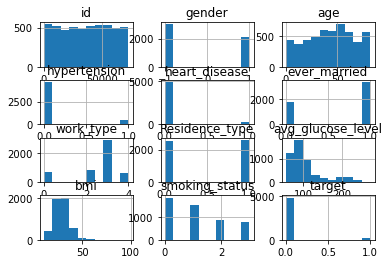

In [88]:
df.hist()

<AxesSubplot:>

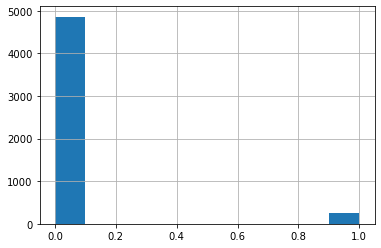

In [89]:
df["target"].hist()

In [6]:
replace_map={'work_type':{'children': 0,'Never_worked': 1, 'Self-employed': 2, 'Private': 3, 'Govt_job': 4}}
labels = df['work_type'].astype('category').cat.categories.tolist()
print(replace_map)
df.replace(replace_map, inplace=True)


{'work_type': {'children': 0, 'Never_worked': 1, 'Self-employed': 2, 'Private': 3, 'Govt_job': 4}}


In [7]:
df["age"].max()
df["hypertension"].max()

1

In [8]:
replace_map={'ever_married':{'Yes': 1, 'No': 0}}
labels = df['ever_married'].astype('category').cat.categories.tolist()
print(replace_map)
df.replace(replace_map, inplace=True)

{'ever_married': {'Yes': 1, 'No': 0}}


In [9]:
replace_map={'Residence_type':{'Urban': 1, 'Rural': 0}}
labels = df['Residence_type'].astype('category').cat.categories.tolist()
print(replace_map)
df.replace(replace_map, inplace=True)

{'Residence_type': {'Urban': 1, 'Rural': 0}}


In [10]:
replace_map={'smoking_status':{'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3}}
labels = df['smoking_status'].astype('category').cat.categories.tolist()
print(replace_map)
df.replace(replace_map, inplace=True)

{'smoking_status': {'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3}}


In [11]:
replace_map={'gender':{'Male': 1, 'Other': 0, 'Female': -1,}}
labels = df['gender'].astype('category').cat.categories.tolist()
print(replace_map)
df.replace(replace_map, inplace=True)


{'gender': {'Male': 1, 'Other': 0, 'Female': -1}}


In [12]:
X = df.drop("target",axis=1).copy()
y=df["target"].copy()

In [38]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, stratify= y, random_state=42)

In [60]:
model1 = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1], name='input'),
                    keras.layers.Dense(400, activation='relu'),
                    keras.layers.Dense(200, activation='relu'),
                    keras.layers.Dense(200, activation='relu'),
                    keras.layers.Dense(100, activation='relu'),
                    keras.layers.Dense(2, activation='softmax', name='output')
                    ])

model1.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics= ['accuracy']
            )

model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 400)               4800      
_________________________________________________________________
dense_53 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_54 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_55 (Dense)             (None, 100)               20100     
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 145,502
Trainable params: 145,502
Non-trainable params: 0
_________________________________________________________________


In [62]:
history1 = model1.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9512 - val_loss: 0.1943 - val_accuracy: 0.9515
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9512 - val_loss: 0.1942 - val_accuracy: 0.9515
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9512 - val_loss: 0.1941 - val_accuracy: 0.9515
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9512 - val_loss: 0.1941 - val_accuracy: 0.9515
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9512 - val_loss: 0.1941 - val_accuracy: 0.9515
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9512 - val_loss: 0.1941 - val_accuracy: 0.9515
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9512 - val_loss: 0.1941 - val_accuracy: 0.9515

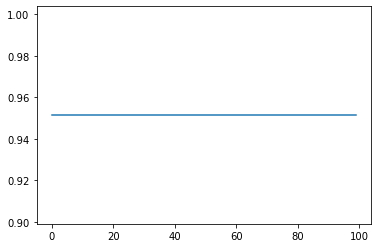

In [63]:
plt.plot(history1.history["val_accuracy"])

In [42]:
np.max(history1.history["val_accuracy"])

0.9514867067337036

In [83]:
model2 = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1], name='input'),
                    keras.layers.Dense(400, activation='selu'),
                    keras.layers.Dense(200, activation='selu'),
                    keras.layers.Dense(200, activation='selu'),
                    keras.layers.Dense(100, activation='selu'),
                    keras.layers.Dense(2, activation='softmax', name='output')
                    ])

model2.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='Adam',
            metrics= ['accuracy']
            )

model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 400)               4800      
_________________________________________________________________
dense_78 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_79 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_80 (Dense)             (None, 100)               20100     
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 145,502
Trainable params: 145,502
Non-trainable params: 0
_________________________________________________________________


In [84]:
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
120/120 [==============================] - 1s 4ms/step - loss: 157.7150 - accuracy: 0.8799 - val_loss: 72.8367 - val_accuracy: 0.9515
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 69.9047 - accuracy: 0.9027 - val_loss: 24.4960 - val_accuracy: 0.9515
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 26.4879 - accuracy: 0.8857 - val_loss: 22.2912 - val_accuracy: 0.9515
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 12.0097 - accuracy: 0.9266 - val_loss: 0.9568 - val_accuracy: 0.9515
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 4.9574 - accuracy: 0.9094 - val_loss: 9.5220 - val_accuracy: 0.9507
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 8.0818 - accuracy: 0.9081 - val_loss: 2.3774 - val_accuracy: 0.9515
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.8882 - accuracy: 0.9452 - val_loss: 4.7475 - val_accuracy

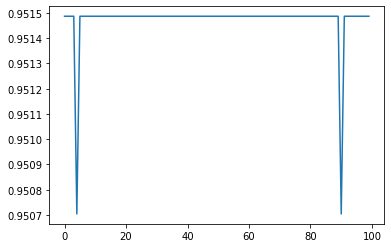

In [85]:
plt.plot(history2.history["val_accuracy"])

In [86]:
np.max(history2.history["val_accuracy"])

0.9514867067337036

In [76]:
model3 = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1], name='input'),
                    keras.layers.Dense(200, activation='softplus'),
                    keras.layers.Dense(100, activation='softplus'),
                    keras.layers.Dense(50, activation='softplus'),
                    keras.layers.Dense(25, activation='softplus'),
                    keras.layers.Dense(2, activation='softmax', name='output')
                    ])

model3.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='Adagrad',
            metrics= ['accuracy']
            )

model3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 200)               2400      
_________________________________________________________________
dense_70 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_71 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_72 (Dense)             (None, 25)                1275      
_________________________________________________________________
output (Dense)               (None, 2)                 52        
Total params: 28,877
Trainable params: 28,877
Non-trainable params: 0
_________________________________________________________________


In [77]:
history3 = model3.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
120/120 [==============================] - 1s 3ms/step - loss: 80.4068 - accuracy: 0.8633 - val_loss: 16.5574 - val_accuracy: 0.9491
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 9.9371 - accuracy: 0.9256 - val_loss: 7.6326 - val_accuracy: 0.9499
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: 9.6954 - accuracy: 0.8981 - val_loss: 3.5171 - val_accuracy: 0.9507
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 7.0971 - accuracy: 0.9110 - val_loss: 8.0366 - val_accuracy: 0.9507
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 5.4742 - accuracy: 0.9194 - val_loss: 8.2985 - val_accuracy: 0.9507
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 6.6100 - accuracy: 0.9120 - val_loss: 4.1264 - val_accuracy: 0.9507
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 5.2019 - accuracy: 0.8946 - val_loss: 0.3335 - val_accuracy: 0.93

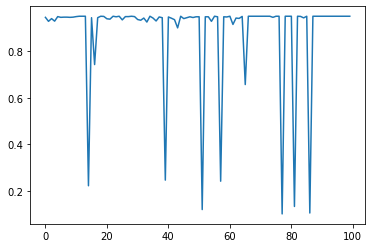

In [73]:
plt.plot(history3.history["val_accuracy"])

In [50]:
np.max(history3.history["val_accuracy"])

0.9514867067337036

In [78]:
model4 = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1], name='input'),
                    keras.layers.Dense(200, activation='softplus'),
                    keras.layers.Dense(100, activation='softplus'),
                    keras.layers.Dense(50, activation='softplus'),
                    keras.layers.Dense(25, activation='softplus'),
                    keras.layers.Dense(2, activation='softmax', name='output')
                    ])

model4.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='Adam',
            metrics= ['accuracy']
            )

model4.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 200)               2400      
_________________________________________________________________
dense_74 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_75 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_76 (Dense)             (None, 25)                1275      
_________________________________________________________________
output (Dense)               (None, 2)                 52        
Total params: 28,877
Trainable params: 28,877
Non-trainable params: 0
_________________________________________________________________


In [79]:
history4 = model4.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
120/120 [==============================] - 1s 3ms/step - loss: 107.6586 - accuracy: 0.8768 - val_loss: 10.4295 - val_accuracy: 0.9515
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 19.8674 - accuracy: 0.9151 - val_loss: 23.7579 - val_accuracy: 0.9515
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 22.4526 - accuracy: 0.9118 - val_loss: 11.5206 - val_accuracy: 0.9515
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 14.4991 - accuracy: 0.9190 - val_loss: 6.2759 - val_accuracy: 0.9515
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 13.6075 - accuracy: 0.9062 - val_loss: 1.4280 - val_accuracy: 0.9476
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 5.2086 - accuracy: 0.8789 - val_loss: 3.1425 - val_accuracy: 0.9515
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 4.8222 - accuracy: 0.9044 - val_loss: 2.8063 - val_accurac

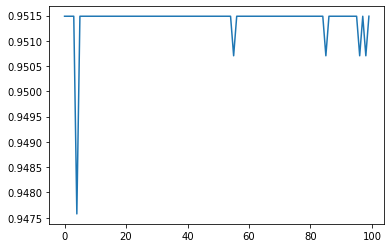

In [81]:
plt.plot(history4.history["val_accuracy"])

In [82]:
np.max(history4.history["val_accuracy"])

0.9514867067337036